In [3]:
import numpy as np
#sigmoid funciton
def sigmoidfunc(x, deriv = False):
    if (deriv == True):
        return x*(1-x)
    return 1/(1 + np.exp(-x))

#input dataset
x = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
#output dataset
y = np.array([[0,0,1,1]]).T

#seed random numbers 
np.random.seed(1)

#init weights rnadomly
weight0 = 2* np.random.random((3, 1)) - 1

for iter in xrange(10000):
    # forward propagation
    layer0 = x
    layer1 = sigmoidfunc(np.dot(layer0, weight0))
    
    # cost function
    layer1_error = y - layer1
    
    if (iter% 1000) == 0:
        print "Error:" + str(np.mean(np.abs(layer1_error)))
    
    #mmultiply how nuch we missed by the slop of the sigmoid at the values of l1
    layer1_delta = layer1_error * sigmoidfunc(layer1, True)
    
    #update weights
    weight0 += np.dot(layer0.T, layer1_delta)
    
print "output after training:"
print layer1
print weight0

Error:0.517208275438
Error:0.0260702596931
Error:0.0181554678526
Error:0.0147234825688
Error:0.0126993147791
Error:0.0113272320733
Error:0.0103192163347
Error:0.00953860309535
Error:0.00891115763147
Error:0.00839264190064
output after training:
[[ 0.00966449]
 [ 0.00786506]
 [ 0.99358898]
 [ 0.99211957]]
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]


Error:0.49847083703
Error:0.5
Error:0.5
Error:0.5
Error:0.5
Error:0.5
Error:0.5
Error:0.5
Error:0.5
Error:0.5
output after training:
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
[[  2.08166817e-16]
 [  2.22044605e-16]
 [ -3.05311332e-16]]


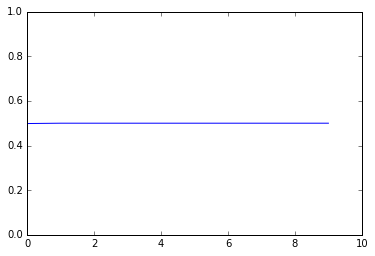

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

errors = []

#sigmoid funciton
def sigmoidfunc(x, deriv = False):
    if (deriv == True):
        return x*(1-x)
    return 1/(1 + np.exp(-x))

#input dataset
x = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])
#output dataset
y = np.array([[0,0,1,1]]).T

x = np.array([[0, 0, 1],
              [1, 1, 1],
              [1, 0, 1],
              [0, 1, 1]])

y = np.array([[0, 0, 1, 1]]).T

np.random.seed(1)

weight0 = 2* np.random.random((3, 1)) - 1

for iter in xrange(10000):
    layer0 = x
    layer1 = sigmoidfunc(np.dot(layer0, weight0))
    
    layer1_error = y - layer1
    
    if (iter% 1000) == 0:
        errors.append(np.mean(np.abs(layer1_error)))
        print "Error:" + str(np.mean(np.abs(layer1_error)))
    
    layer1_delta = layer1_error * sigmoidfunc(layer1, True)
    
    weight0 += np.dot(layer0.T, layer1_delta)
    
print "output after training:"
print layer1
print weight0


plt.plot(range(10), errors)
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,1])
plt.show()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Error:0.496410031903
Error:0.00858452565325
Error:0.00578945986251
Error:0.00462917677677
Error:0.00395876528027
Error:0.00351012256786


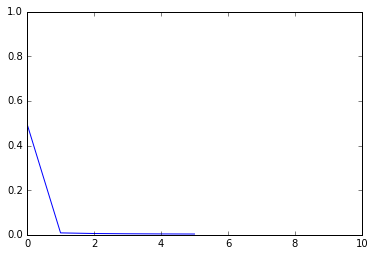

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
errors = []

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)

    return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
                
y = np.array([[0],
              [1],
              [1],
              [0]])

np.random.seed(1)

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

for j in xrange(60000):

    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print "Error:" + str(np.mean(np.abs(l2_error)))
        errors.append(np.mean(np.abs(l2_error)))

        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

plt.plot(range(6), errors)
axes = plt.gca()
axes.set_xlim([0,10])
axes.set_ylim([0,1])
plt.show()

In [1]:
import numpy as np
import cv2

def run_main():
    capture = cv2.VideoCapture(0)
    capture.set(cv2.cv.CV_CAP_PROP_FRAME_WIDTH, 1280)
    capture.set(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT, 720)

    while(True):
        ret, frame = capture.read()
        roi = frame[0:500, 0:500]
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
        thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 11, 1)

        kernel = np.ones((3, 3), np.uint8)
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
            kernel, iterations=4

        cont_img = closing.copy()
        contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area < 2000 or area > 4000:
                continue

            if len(cnt) < 5:
                continue

            ellipse = cv2.fitEllipse(cnt)
            cv2.ellipse(frame, ellipse, (0,255,0), 2)

        cv2.imshow("Closing", closing)
        cv2.imshow("Threshold", thresh)
        cv2.imshow('Circles', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    capture.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    run_main()


SyntaxError: invalid syntax (<ipython-input-1-7ff41abcc457>, line 22)

In [53]:
np.dot?